In [ ]:
pip install emoji

In [ ]:
#Import all the necessary modules

import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import *
import nltk
import datetime as dt
from matplotlib.ticker import MaxNLocator
import regex
import emoji
from seaborn import *
from wordcloud import WordCloud , STOPWORDS , ImageColorGenerator
from nltk import *
from plotly import express as px
# nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
# Read the content of the chat file

f = open("wca-data-main.txt",'r', encoding ='utf-8')
data = f.read()
data

'3/24/22, 20:26 - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.\n3/24/22, 20:03 - Trushil created group "Core ke chode "\n3/24/22, 20:03 - Trushil added you\n3/24/22, 20:06 - Trushil changed the group name from "Core ke chode " to "Cuties of core"\n3/24/22, 20:15 - Prasham started a call\n3/24/22, 20:04 - Prasham: What\'s this for\n3/24/22, 20:04 - Trushil: Kale savare 9 vage movie jova javu chhe\n3/24/22, 20:04 - Trushil: RRR\n3/24/22, 20:04 - Prasham: Ok\n3/24/22, 20:04 - Prasham: But where\n3/24/22, 20:05 - Trushil: 150rupees ticket\n3/24/22, 20:05 - Prasham: Plz change the name\n3/24/22, 20:05 - Jeet: Inox adalaj\n3/24/22, 20:05 - Trushil: World famous Inox\n3/24/22, 20:05 - Prasham: My phone always gets checkes\n3/24/22, 20:05 - Prasham: Checked\n3/24/22, 20:05 - Prasham: Adalaj\n3/24/22, 20:06 - Prasham: Ok\n3/24/22, 20:06 - Prasham: <Media omitted>\n3/24/22, 20:08 - Trushil: First 3 lac

In [ ]:
# Extract date, user, and message using regular expressions

pattern = '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s'
messages = re.split(pattern, data)[1:]
dates = re.findall(pattern, data)

# Create a DataFrame
df = pd.DataFrame({'user_message': messages, 'message_date': dates})
# convert message_date type
df['message_date'] = pd.to_datetime(df['message_date'], format='%m/%d/%y, %H:%M - ')
df.rename(columns={'message_date': 'date'}, inplace=True)

#Show data
df

,user_message,date
0,Messages and calls are end-to-end encrypted. N...,2022-03-24 20:26:00
1,"Trushil created group ""Core ke chode ""\n",2022-03-24 20:03:00
2,Trushil added you\n,2022-03-24 20:03:00
3,"Trushil changed the group name from ""Core ke c...",2022-03-24 20:06:00
4,Prasham started a call\n,2022-03-24 20:15:00
...,...,...
4251,Trushil: Yes\n,2023-11-26 20:50:00
4252,Trushil: Aaja valo khelenge\n,2023-11-26 20:50:00
4253,Trushil: Gaddi bhi hai apne pass\n,2023-11-26 20:50:00
4254,Trushil: 12 baje ke baad aane vale hai\n,2023-11-26 20:50:00


In [ ]:
#Split the user_message column

users = []
messages = []
for message in df['user_message']:
    if 'You changed the group name from' in message:
        users.append('group_notification')
        messages.append(message)
        continue
    else:
        entry = re.split('([\w\W]+?):\s', message)
        if entry[1:]:  # user name
            users.append(entry[1])
            messages.append(" ".join(entry[2:]))
        else:
            users.append('group_notification')
            messages.append(entry[0])

df['user'] = users
df['message'] = messages
df.drop(columns=['user_message'], inplace=True)

#Show data
df

,date,user,message
0,2022-03-24 20:26:00,group_notification,Messages and calls are end-to-end encrypted. N...
1,2022-03-24 20:03:00,group_notification,"Trushil created group ""Core ke chode ""\n"
2,2022-03-24 20:03:00,group_notification,Trushil added you\n
3,2022-03-24 20:06:00,group_notification,"Trushil changed the group name from ""Core ke c..."
4,2022-03-24 20:15:00,group_notification,Prasham started a call\n
...,...,...,...
4251,2023-11-26 20:50:00,Trushil,Yes\n
4252,2023-11-26 20:50:00,Trushil,Aaja valo khelenge\n
4253,2023-11-26 20:50:00,Trushil,Gaddi bhi hai apne pass\n
4254,2023-11-26 20:50:00,Trushil,12 baje ke baad aane vale hai\n


In [ ]:
### Checking shape of dataset.
df.shape

### Checking basic information of dataset
df.info()

### Checking no. of null values in dataset
df.isnull().sum()

### Checking head part of dataset
df.head(50)

### Checking tail part of dataset
df.tail(50)

### Droping Nan values from dataset
df = df.dropna()
df = df.reset_index(drop=True)
df.shape

### Checking no. of authors of group
df['user'].nunique()

### Checking authors of group
df['user'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4256 entries, 0 to 4255
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     4256 non-null   datetime64[ns]
 1   user     4256 non-null   object        
 2   message  4256 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 99.9+ KB


array(['group_notification', 'Prasham', 'Trushil', 'Jeet', 'Abhi',
       'Naitik', 'Keval', 'Jainam', 'Çhâñdâñ', 'Neel', 'Manthan',
       'Nisarg', 'Het Usci', 'Darshan', 'Prasuk', 'Jaimin Usci'],
      dtype=object)

In [ ]:
### Counting number of letters in each message
df['Letters'] = df['message'].apply(lambda s : len(s))

### Counting number of word's in each message
df['Words'] = df['message'].apply(lambda s : len(s.split(' ')))

#Show updated data
df

,date,user,message,Letters,Words
0,2022-03-24 20:26:00,group_notification,Messages and calls are end-to-end encrypted. N...,140,25
1,2022-03-24 20:03:00,group_notification,"Trushil created group ""Core ke chode ""\n",39,7
2,2022-03-24 20:03:00,group_notification,Trushil added you\n,18,3
3,2022-03-24 20:06:00,group_notification,"Trushil changed the group name from ""Core ke c...",73,14
4,2022-03-24 20:15:00,group_notification,Prasham started a call\n,23,4
...,...,...,...,...,...
4251,2023-11-26 20:50:00,Trushil,Yes\n,4,1
4252,2023-11-26 20:50:00,Trushil,Aaja valo khelenge\n,19,3
4253,2023-11-26 20:50:00,Trushil,Gaddi bhi hai apne pass\n,24,5
4254,2023-11-26 20:50:00,Trushil,12 baje ke baad aane vale hai\n,30,7


In [ ]:
# Drop rows with 'media omitted' message
new_df = df[df['message'].str.strip() != '<Media omitted>']

# Drop rows with NaN values
new_df = new_df.dropna()

# Print the new DataFrame
new_df

,date,user,message,Letters,Words
0,2022-03-24 20:26:00,group_notification,Messages and calls are end-to-end encrypted. N...,140,25
1,2022-03-24 20:03:00,group_notification,"Trushil created group ""Core ke chode ""\n",39,7
2,2022-03-24 20:03:00,group_notification,Trushil added you\n,18,3
3,2022-03-24 20:06:00,group_notification,"Trushil changed the group name from ""Core ke c...",73,14
4,2022-03-24 20:15:00,group_notification,Prasham started a call\n,23,4
...,...,...,...,...,...
4250,2023-11-26 20:49:00,Jainam,Where at flat?\n,15,3
4251,2023-11-26 20:50:00,Trushil,Yes\n,4,1
4252,2023-11-26 20:50:00,Trushil,Aaja valo khelenge\n,19,3
4253,2023-11-26 20:50:00,Trushil,Gaddi bhi hai apne pass\n,24,5


In [ ]:
#Total number of members

Total_Members = len(df['user'].unique()) - 1
Total_Members

15

In [ ]:
#Total number of messages

total_messages = df.shape[0]
print('Total Number of Messages : {}'.format(total_messages))

Total Number of Messages : 4256


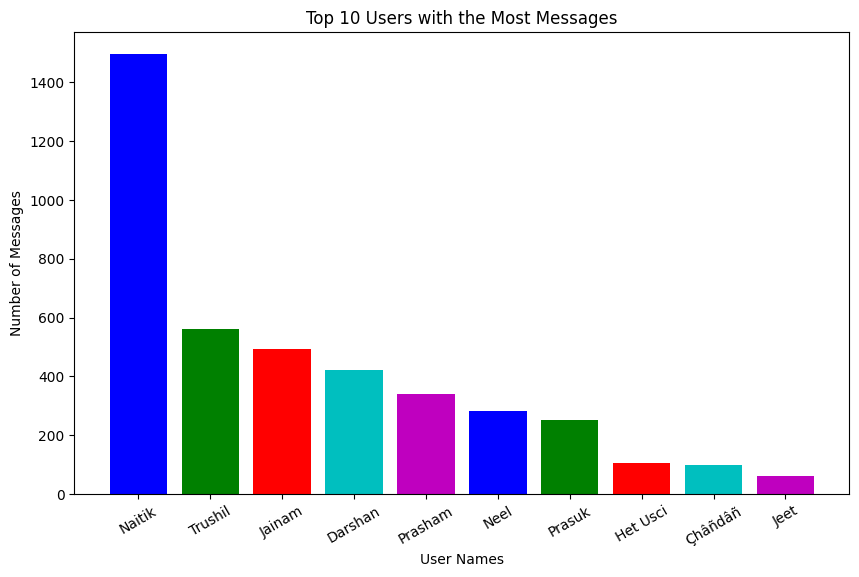

In [ ]:
#Top 10 Users With Most Messages

df = df[df['user'] != 'group_notification']
mess_per_user = df['user'].value_counts()
mess_per_user = dict(mess_per_user)

# Sample data (replace with your actual data)
user_names = list(mess_per_user.keys())
message_counts = list(mess_per_user.values())
num_of_users_in_hist = 10
# Sort the data by message counts and get the top 10 users
sorted_data = sorted(zip(user_names, message_counts), key=lambda x: x[1], reverse=True)[:num_of_users_in_hist]
user_names, message_counts = zip(*sorted_data)

# Define a list of distinct colors to cycle through
colors = ['b', 'g', 'r', 'c', 'm']

# Create the histogram with multicolored bars
plt.figure(figsize=(10, 6))  # Optional: Adjust the figure size
bars = plt.bar(user_names, message_counts, color=colors)

plt.xlabel('User Names')
plt.ylabel('Number of Messages')
plt.title(f'Top {num_of_users_in_hist} Users with the Most Messages')
plt.xticks(rotation=30)  # Rotate x-axis labels for vertical orientation

plt.show()

In [ ]:
#Messages per user

mess_per_user

{'Naitik': 1495,
 'Trushil': 561,
 'Jainam': 492,
 'Darshan': 423,
 'Prasham': 340,
 'Neel': 282,
 'Prasuk': 253,
 'Het Usci': 105,
 'Çhâñdâñ': 98,
 'Jeet': 60,
 'Nisarg': 50,
 'Manthan': 48,
 'Keval': 20,
 'Jaimin Usci': 5,
 'Abhi': 3}

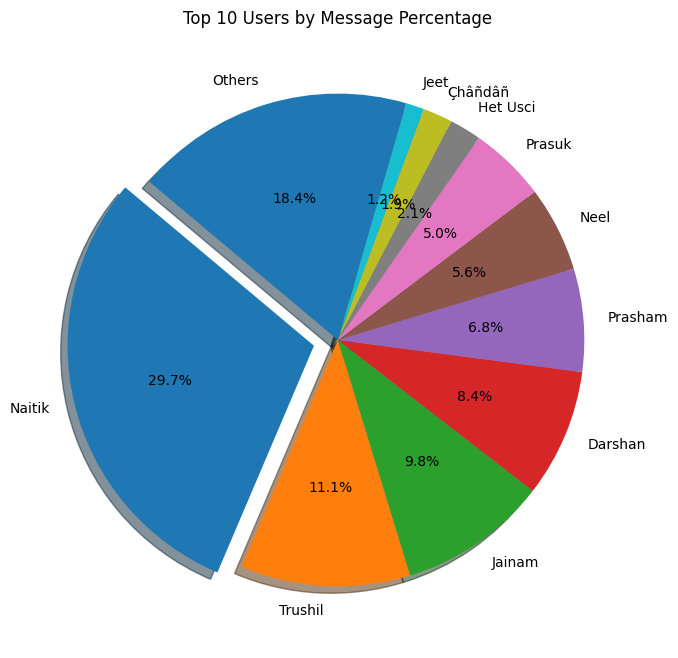

In [ ]:
#Percentage distribution of messages by user

# Sort the data by percentage in descending order
sorted_data = sorted(mess_per_user.items(), key=lambda x: x[1], reverse=True)
num_of_users_in_pie_chart = 10
# Take the top 5 highest percentages and group the rest as "Others"
top_5_data = sorted_data[:num_of_users_in_pie_chart]
remaining_percentage = sum(item[1] for item in sorted_data[5:])
top_5_data.append(('Others', remaining_percentage))

# Separate labels and percentages for the pie chart
labels, percentages = zip(*top_5_data)

# Create the pie chart
plt.figure(figsize=(8, 8))  # Optional: Adjust the figure size
explode = (0.1,0,0,0,0,0,0,0,0,0,0)  # Explode the 1st slice (Hamza SNS)

plt.pie(percentages, labels=labels, autopct='%1.1f%%', startangle=140, explode=explode, shadow=True)
plt.title(f'Top {num_of_users_in_pie_chart} Users by Message Percentage')

plt.show()

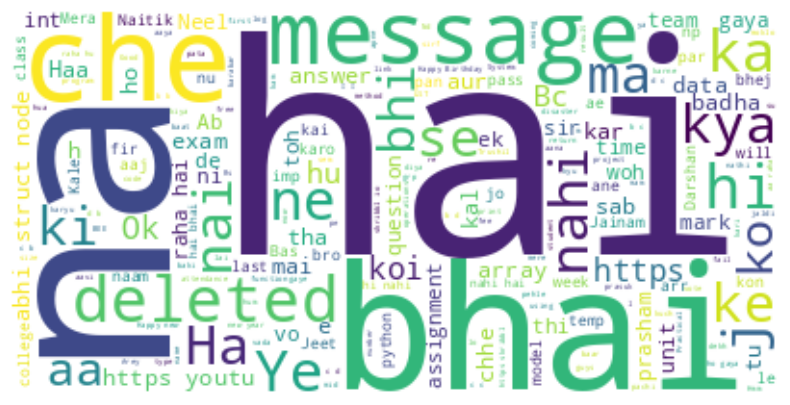

In [ ]:
#Let’s create a word cloud of most used words in chat :

### Word Cloud of mostly used word in our Group
text = " ".join(review for review in new_df.message)
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white").generate(text)

### Display the generated image:
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
#Frequency of emojis used in chat

emojis = []
emoji_dict = emoji.get_emoji_unicode_dict(lang='en')
for message in new_df['message']:
    emojis.extend([c for c in message if c in emoji_dict.values()])

print("Frequency of the emojis used in the whole chat")
pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))

Frequency of the emojis used in the whole chat


,0,1
0,😂,148
1,🤣,131
2,👍,80
3,🔥,59
4,🏻,55
...,...,...
112,💣,1
113,🙇,1
114,👿,1
115,🤡,1


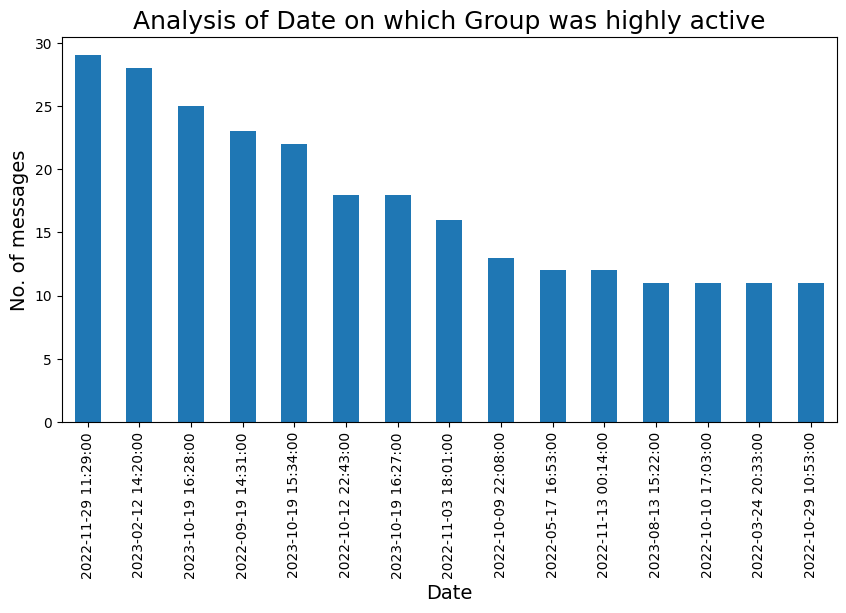

In [ ]:
### Date on which our Group was highly active.

plt.figure(figsize=(10,5))
df['date'].value_counts().head(15).plot.bar()
plt.xlabel('Date',fontdict={'fontsize': 14,'fontweight': 10})
plt.ylabel('No. of messages',fontdict={'fontsize': 14,'fontweight': 10})
plt.title('Analysis of Date on which Group was highly active',fontdict={'fontsize': 18,'fontweight': 8})
plt.show()

In [ ]:
# Create a time series plot w.r.t. no. of messages:

z = df['date'].value_counts()  # Count messages per date
z1 = z.to_dict()  # Convert counts to a dictionary

# Create a new column 'Msg_count' to store message counts
for i, row in df.iterrows():
    df.loc[i, 'Msg_count'] = z1.get(row['date'], 0)

# Create the timeseries plot
fig = px.line(x=df['date'], y=df['Msg_count'])
fig.update_layout(title='Analysis of Number of Messages using Time Series Plot',
                  xaxis_title='Date',
                  yaxis_title='No. of Messages')
fig.update_xaxes(nticks=20)
fig.show()

In [ ]:
new_df

,date,user,message,Letters,Words
0,2022-03-24 20:26:00,group_notification,Messages and calls are end-to-end encrypted. N...,140,25
1,2022-03-24 20:03:00,group_notification,"Trushil created group ""Core ke chode ""\n",39,7
2,2022-03-24 20:03:00,group_notification,Trushil added you\n,18,3
3,2022-03-24 20:06:00,group_notification,"Trushil changed the group name from ""Core ke c...",73,14
4,2022-03-24 20:15:00,group_notification,Prasham started a call\n,23,4
...,...,...,...,...,...
4250,2023-11-26 20:49:00,Jainam,Where at flat?\n,15,3
4251,2023-11-26 20:50:00,Trushil,Yes\n,4,1
4252,2023-11-26 20:50:00,Trushil,Aaja valo khelenge\n,19,3
4253,2023-11-26 20:50:00,Trushil,Gaddi bhi hai apne pass\n,24,5


In [ ]:
sentiments = SentimentIntensityAnalyzer()
new_df['positive'] = [sentiments.polarity_scores(i)['pos'] for i in new_df['message']]
new_df['negative'] = [sentiments.polarity_scores(i)['neg'] for i in new_df['message']]
new_df['neutral'] = [sentiments.polarity_scores(i)['neu'] for i in new_df['message']]

new_df

,date,user,message,Letters,Words,positive,negative,neutral
0,2022-03-24 20:26:00,group_notification,Messages and calls are end-to-end encrypted. N...,140,25,0.000,0.084,0.916
1,2022-03-24 20:03:00,group_notification,"Trushil created group ""Core ke chode ""\n",39,7,0.286,0.000,0.714
2,2022-03-24 20:03:00,group_notification,Trushil added you\n,18,3,0.000,0.000,1.000
3,2022-03-24 20:06:00,group_notification,"Trushil changed the group name from ""Core ke c...",73,14,0.211,0.000,0.789
4,2022-03-24 20:15:00,group_notification,Prasham started a call\n,23,4,0.000,0.000,1.000
...,...,...,...,...,...,...,...,...
4250,2023-11-26 20:49:00,Jainam,Where at flat?\n,15,3,0.000,0.000,1.000
4251,2023-11-26 20:50:00,Trushil,Yes\n,4,1,1.000,0.000,0.000
4252,2023-11-26 20:50:00,Trushil,Aaja valo khelenge\n,19,3,0.000,0.000,1.000
4253,2023-11-26 20:50:00,Trushil,Gaddi bhi hai apne pass\n,24,5,0.000,0.000,1.000


In [ ]:
new_df[new_df['user'] == 'Neel']

,date,user,message,Letters,Words,positive,negative,neutral
113,2022-03-24 23:09:00,Neel,🎉🎉\n,3,1,0.0,0.0,1.0
154,2022-03-30 23:01:00,Neel,Ha\n,3,1,1.0,0.0,0.0
340,2022-04-30 21:20:00,Neel,Press F\n,8,2,0.0,0.0,1.0
346,2022-04-30 23:38:00,Neel,💥💥💥💥\n,5,1,0.0,0.0,1.0
347,2022-04-30 23:38:00,Neel,Yeaahhhhhh\n,11,1,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
4213,2023-11-22 14:00:00,Neel,Batting j 5over man Ave La\n,27,6,0.0,0.0,1.0
4214,2023-11-22 14:00:00,Neel,😂😂\n,3,1,0.0,0.0,1.0
4219,2023-11-23 09:37:00,Neel,Ha\n,3,1,1.0,0.0,0.0
4242,2023-11-26 16:16:00,Neel,.\n,2,1,0.0,0.0,0.0


In [ ]:
unique_users_df = new_df.drop_duplicates(subset=['user'])
unique_users_df = unique_users_df['user']
unique_users_df = pd.DataFrame(unique_users_df)
unique_users_df['positive'] = None
unique_users_df['negative'] = None
unique_users_df['neutral'] = None
unique_users_df

,user,positive,negative,neutral
0,group_notification,None,None,None
5,Prasham,None,None,None
6,Trushil,None,None,None
12,Jeet,None,None,None
35,Abhi,None,None,None
36,Naitik,None,None,None
37,Keval,None,None,None
53,Jainam,None,None,None
58,Çhâñdâñ,None,None,None
113,Neel,None,None,None


In [ ]:
for i in unique_users_df['user'].values:
    each_df = new_df[new_df['user'] == i]
    pos = sum(each_df['positive'])
    neg = sum(each_df['negative'])
    neu = sum(each_df['neutral'])
    unique_users_df.loc[unique_users_df['user'] == i, 'positive'] = pos
    unique_users_df.loc[unique_users_df['user'] == i, 'negative'] = neg
    unique_users_df.loc[unique_users_df['user'] == i, 'neutral'] = neu

unique_users_df

,user,positive,negative,neutral
0,group_notification,1.301,0.175,19.524
5,Prasham,32.898,4.413,206.688
6,Trushil,23.841,9.924,476.235
12,Jeet,2.444,0.986,34.57
35,Abhi,0.0,0.0,3.0
36,Naitik,78.65,19.667,1067.684
37,Keval,3.725,0.0,13.275
53,Jainam,19.496,8.493,281.009
58,Çhâñdâñ,9.035,1.052,61.913
113,Neel,15.275,3.525,201.201


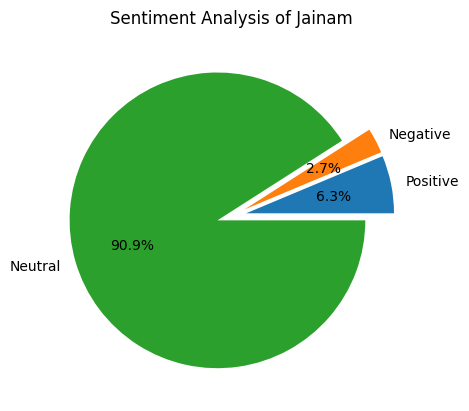

<Figure size 1000x1000 with 0 Axes>

In [ ]:
user = 'Jainam'
pos = unique_users_df.loc[unique_users_df['user'] == user, 'positive'].values[0]
neg = unique_users_df.loc[unique_users_df['user'] == user, 'negative'].values[0]
neu = unique_users_df.loc[unique_users_df['user'] == user, 'neutral'].values[0]

sentiment_values = [pos, neg, neu]
labels = ['Positive', 'Negative', 'Neutral']
explode = (0.1, 0.1, 0.1)
title = f"Sentiment Analysis of {user}"
plt.pie(sentiment_values, labels=labels, explode=explode,autopct='%1.1f%%')
plt.title(title)
plt.figure(figsize=(10, 10))
plt.show()